In [1]:
import glob
from tifffile import imread
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import skimage.filters
import torch
import shutil, os

data_dir= '/n/holylfs/LABS/wadduwage_lab/Lab/wadduwage-lab-data/Confocal/20200210_confocal-3d_Seeber-lab_h2ax-cells/63xZseriesSmall'
sample_dirs =  sorted(glob.glob(f'{data_dir}/*_w1*.stk'), key= lambda x: int(x.split('/')[-1][:-4].split('_')[-1][1:]))

In [7]:
def clip_thres500(img):return np.clip(img, 0, 500)/500.0

img= imread(sample_dirs[0])
im_max= np.max(img, axis=0)
im_max_filt= torch.from_numpy(clip_thres500(im_max).astype('float'))

patch_size= 256
patches= im_max_filt.reshape(im_max_filt.shape[0]//patch_size, patch_size, im_max_filt.shape[0]//patch_size, patch_size).permute(0, 2, 1, 3).flatten(end_dim= 1)


0.256 1.0


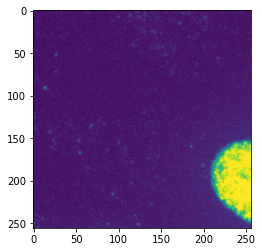

In [12]:
init_img= patches[10].numpy()

print(init_img.min(), init_img.max())
plt.imshow(init_img)

In [14]:
import cv2
init_img= patches[0].numpy()

plt.imsave('test_plt.png' , init_img)
cv2.imwrite('test_cv2.png' , (255*init_img).astype('uint8'))

True

In [19]:
print('plt saved image : reading from plt, cv2 -> ', plt.imread('test_plt.png').shape, cv2.imread('test_plt.png').shape)
print('cv2 saved image : reading from plt, cv2 -> ', plt.imread('test_cv2.png').shape, cv2.imread('test_cv2.png').shape)

plt saved image : reading from plt, cv2 ->  (256, 256, 4) (256, 256, 3)
cv2 saved image : reading from plt, cv2 ->  (256, 256) (256, 256, 3)


In [23]:
plt.imread('test_cv2.png')[:5, 0], init_img[:5, 0]

(array([0.26666668, 0.2627451 , 0.2627451 , 0.27450982, 0.2509804 ],
       dtype=float32),
 array([0.268, 0.266, 0.264, 0.278, 0.252]))

## Conclusion:
For gray scale images, 

1. save using cv2
2. load using plt

### Difference between initial image and saved image is not that much. BUT NOT EXACTLY SAME !!!